# Matplotlib



## Matplotlib 的组成

matplotlib 是一个完整的绘图库，包含以下主要模块：

matplotlib.pyplot： 提供类似 MATLAB 的功能，直接调用函数即可生成图表，是 Matplotlib 最常用的模块。

matplotlib.figure： 管理图形对象的模块，通常用户不直接操作。

matplotlib.axes： 管理图表的坐标系和具体绘图内容

https://www.worldometers.info/co2-emissions/co2-emissions-by-country/    二氧化碳排放数据

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df_annual = pd.read_csv("data/co2_annmean_mlo.csv", skiprows=43)    
df_annual.tail()

# 跳过前 43 行数据：在读取 CSV 文件时，忽略文件开头的 43 行内容。

,year,mean,unc
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12
63,2022,418.53,0.12


In [20]:
df = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/")
df

# 从网页上取数据， 有可能取到几个表格

[       #                  Country  CO2 Emissions  (tons, 2022) 1 Year  Change  \
 0      1                    China                  12667428430         -0.39%   
 1      2            United States                   4853780240          1.78%   
 2      3                    India                   2693034100          6.52%   
 3      4                   Russia                   1909039310         -1.22%   
 4      5                    Japan                   1082645430          0.65%   
 ..   ...                      ...                          ...            ...   
 201  202  Saint Pierre & Miquelon                        37110         -1.46%   
 202  203                 Anguilla                        22810          3.63%   
 203  204         Falkland Islands                        21770          0.14%   
 204  205             Saint Helena                        17900         12.30%   
 205  206           Faeroe Islands                         2110          0.48%   
 
      Populati

In [21]:
len(df)     # 指定网址读取到的 HTML 表格数量  结果1个表格

1

In [23]:
df = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0]
df

# 取网页的第一个表格（也就1个）--》 得到好看点的Dataframe 。index_col=0, 去掉前面的index列。

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,Share of world
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00%
203,Anguilla,22810,3.63%,14180,1.61,0.00%
204,Falkland Islands,21770,0.14%,3490,6.24,0.00%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            206 non-null    int64  
 1   Country                      206 non-null    object 
 2   CO2 Emissions  (tons, 2022)  206 non-null    int64  
 3   1 Year  Change               206 non-null    object 
 4   Population  (2022)           206 non-null    int64  
 5   Per  capita                  206 non-null    float64
 6   Share  of world              206 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 11.4+ KB


In [24]:
df = df.rename({"Share  of world":"World percentage"}, axis=1)   # 改变的是列名
df

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88%
2,United States,4853780240,1.78%,341534046,14.21,12.60%
3,India,2693034100,6.52%,1425423212,1.89,6.99%
4,Russia,1909039310,-1.22%,145579899,13.11,4.96%
5,Japan,1082645430,0.65%,124997578,8.66,2.81%
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00%
203,Anguilla,22810,3.63%,14180,1.61,0.00%
204,Falkland Islands,21770,0.14%,3490,6.24,0.00%


In [27]:
# remove World percentage column : % 去掉 %, 转换类型到 float

df["World percentage"] = df["World percentage"].str.rstrip("%").astype(float)
df

,Country,"CO2 Emissions (tons, 2022)",1 Year Change,Population (2022),Per capita,World percentage
#,,,,,,
1,China,12667428430,-0.39%,1425179569,8.89,32.88
2,United States,4853780240,1.78%,341534046,14.21,12.60
3,India,2693034100,6.52%,1425423212,1.89,6.99
4,Russia,1909039310,-1.22%,145579899,13.11,4.96
5,Japan,1082645430,0.65%,124997578,8.66,2.81
...,...,...,...,...,...,...
202,Saint Pierre & Miquelon,37110,-1.46%,5732,6.47,0.00
203,Anguilla,22810,3.63%,14180,1.61,0.00
204,Falkland Islands,21770,0.14%,3490,6.24,0.00


<Axes: xlabel='Country'>

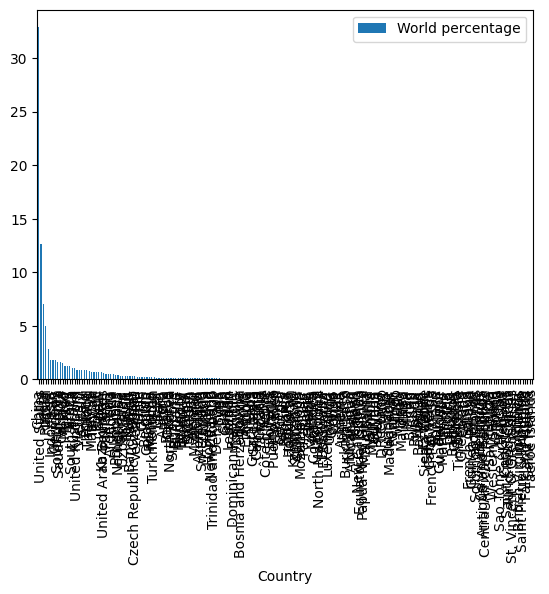

In [28]:
df.plot(kind='bar', x='Country', y='World percentage')

<Axes: xlabel='Country'>

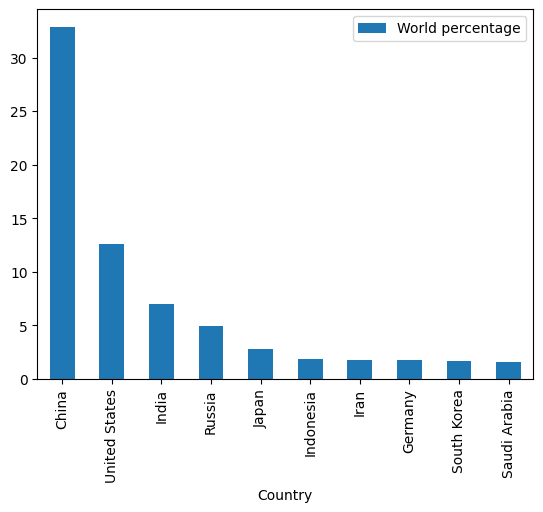

In [51]:
df.head(10).plot(kind='bar', x='Country', y='World percentage')

## Remove clutter 清除杂乱

make the visals much better

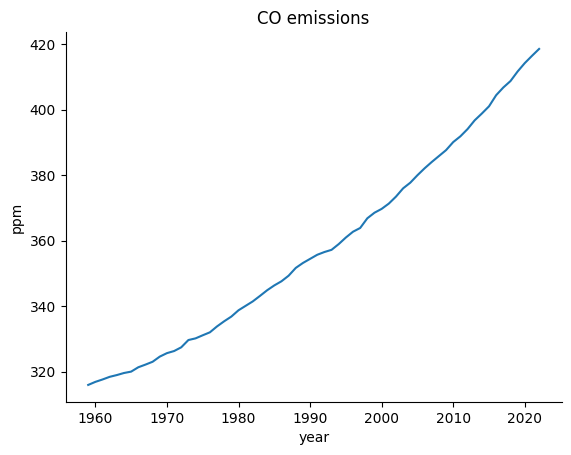

In [54]:
# 隐藏 图片上边和右边的边框，隐藏图表中的 图例

ax_annual = df_annual.plot(x="year", y="mean",ylabel="ppm", title="CO emissions")
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.legend().set_visible(False)       # 隐藏图表中的 图例（legend）



# spines 是 Matplotlib 中控制图表边框的一个属性:它是一个字典对象，用来存储四个边框："top"（顶部）、"bottom"（底部）、"left"（左侧）、"right"（右侧）。
# set_visible(False): 这是隐藏某个边框的方法。 False，隐藏该边框； True，则显示。

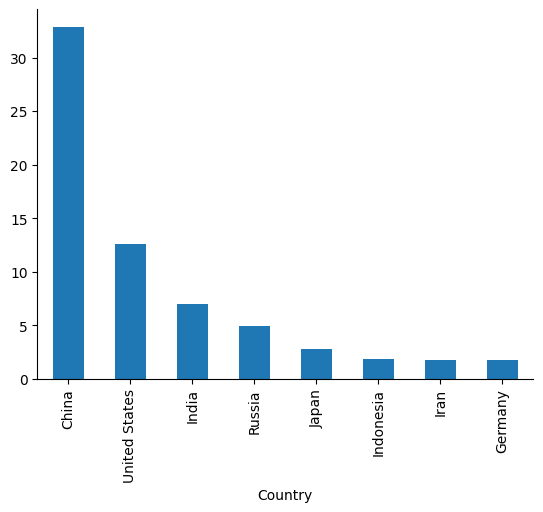

In [53]:
ax_percentage = df.head(8).plot(kind='bar', x='Country', y='World percentage')
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.legend().set_visible(False)                                 

## Attention

Text(0.0, 1.0, 'The annual mean of CO_@$ emissions\n in Mauna loa has increased every year since 1959')

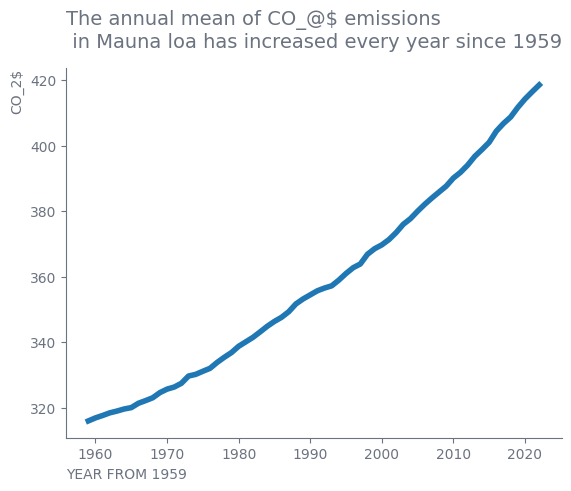

In [69]:
GRAY1 = "#6B7280"  # 灰色

ax_annual = df_annual.plot(x="year", y="mean", ylabel="ppm", linewidth= 4)   # 曲线变粗
ax_annual.spines["top"].set_visible(False)
ax_annual.spines["right"].set_visible(False)
ax_annual.spines["left"].set_color(GRAY1)    # 左边框（left spine） 和 底边框（bottom spine） 设置颜色为 GRAY1
ax_annual.spines["bottom"].set_color(GRAY1)
ax_annual.legend().set_visible(False)

ax_annual.tick_params(axis="both", colors=GRAY1)
#  x 和 y 轴刻度线 和 刻度标签 颜色都设置为 GRAY1 指定的灰色

ax_annual.set_xlabel("YEAR FROM 1959", loc="left", color=GRAY1)
ax_annual.set_ylabel("CO_2$", loc="top", color=GRAY1)

ax_annual.set_title(
    "The annual mean of CO_@$ emissions\n in Mauna loa has increased every year since 1959",
    loc="left",
    pad=15,      # 控制标题或标签与图形的距离（间距）
    color=GRAY1,
    fontsize=14  # 设置标题或标签的字体大小。数字越大，字体越大。适用于 set_title、set_xlabel、set_ylabel 等。
)

number_countries = 8：表示总共有 8 个国家。
top_emitter = 3：表示前 3 个国家是“主要排放国”（或某种特殊类别），需要用一种颜色标注。

red（红色，#be123c）：用于突出显示前 3 个国家。
gray（灰色，#4b5563）：用于表示其他国家。

1. [red]*top_emitter：       
生成一个包含 red 的列表，长度为 top_emitter（即前 3 个国家）。
结果：[red, red, red]

2. [gray]*(number_countries-top_emitter)：   
生成一个包含 gray 的列表，长度为 number_countries - top_emitter（即剩余的 5 个国家）。  
结果：[gray, gray, gray, gray, gray]       

3. +：将两个列表拼接在一起。
最终结果：[red, red, red, gray, gray, gray, gray, gray]

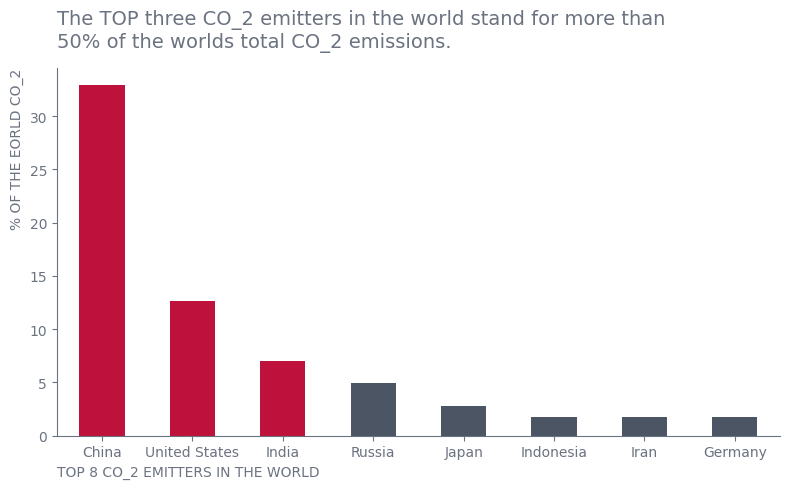

In [83]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"

colors = [red]*top_emitter + [gray]*(number_countries-top_emitter)   
# 颜色 = [红色] * 顶部发射器 + [灰色] * (国家数量-顶部发射器)

ax_percentage = df.head(8).plot(kind='bar', x='Country', y='World percentage', color=colors, rot=0)
# rot 是 rotation 的缩写，表示旋转角度。rot=0 意味着刻度标签（tick labels）不旋转，保持水平
ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.legend().set_visible(False)  

ax_percentage.set_xlabel("TOP 8 CO_2 EMITTERS IN THE WORLD", loc="left", color=GRAY1)
ax_percentage.set_ylabel("% OF THE EORLD CO_2", loc="top", color=GRAY1)

ax_percentage.spines["top"].set_visible(False)
ax_percentage.spines["right"].set_visible(False)
ax_percentage.spines["left"].set_color(GRAY1)    
ax_percentage.spines["bottom"].set_color(GRAY1)

ax_percentage.tick_params(axis="both", colors=GRAY1)

ax_percentage.set_title(
    "The TOP three CO_2 emitters in the world stand for more than \n50% of the worlds total CO_2 emissions.",
    loc="left",
    pad=15,      # 控制标题或标签与图形的距离（间距）
    color=GRAY1,
    fontsize=14  # 设置标题或标签的字体大小。数字越大，字体越大。适用于 set_title、set_xlabel、set_ylabel 等。
)

fig = ax_percentage.get_figure()    # 获取当前图表的 Figure 对象
fig.set_size_inches(8, 5)      # 设置图表的大小，单位是英寸。8 是图表的宽度，5 是图表的高度。
fig.tight_layout()   # 自动调整图表的布局，确保图表中的元素（如标题、标签、刻度等）不会重叠，并且在图形区域内有合理的间距。

# 保存图像 到当前文件夹 png格式。
# fig.savefig()：这是 Matplotlib 中保存图表的函数。它会将当前图表（Figure）保存到指定的文件中。
# dpi=200，图像的分辨率， 默认100， 200 分辨率高。
fig.savefig("top_emitters", dpi=200)

1. fig = ax_percentage.get_figure()      fig， as
作用：获取 Axes 对象（例如 ax_percentage）所在的 Figure 对象。
为什么需要这行代码：
在 Matplotlib 中，图表的“容器”是 Figure，而实际绘制内容的位置是 Axes。每个 Axes 都属于一个 Figure。
如果你想修改整个图表（而不是单个 Axes）的属性（例如大小、布局），你需要获取 Figure 对象。get_figure() 就是用来从 Axes 获取到对应的 Figure 对象。
这行代码确保你能对图表的整体属性进行设置，而不仅仅是某个子区域。

In [84]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


## OOP (Object-Oriented Programming) approach

在 Matplotlib 中，OOP (Object-Oriented Programming) approach 是一种使用对象和方法直接操作图形和轴的绘图方式。相比于 Matplotlib 的 pyplot 风格（类似 MATLAB 的命令式接口，例如 plt.plot），OOP 方法提供了更精确的控制，特别是在创建复杂图形时。

核心思想
在 OOP 方法 中，你直接操作 Figure（图形容器） 和 Axes（绘图区域）对象。
通过对象的属性和方法，可以灵活地设置图形元素，而不是依赖全局的 pyplot 接口。
为什么使用 OOP 方法？
精细控制：可以对每个子图独立调整标题、刻度、颜色等属性。
可读性高：代码结构更清晰，特别是有多个子图时。
适合复杂图表：例如多轴图表、多子图布局等。
OOP 方法 vs pyplot 方法
特性	OOP 方法	pyplot 方法
灵活性	更高，适合复杂图形	简单，适合快速绘图
代码结构	面向对象，代码清晰	函数式，依赖全局状态
多子图支持	易于控制多个子图	手动配置多个子图可能较复杂
推荐场景	复杂图形（多子图、定制化需求多）	简单图形（单个图表或快速实验）
基本用法
以下是 OOP 方法的基本框架：

python
Kopiera kod
import matplotlib.pyplot as plt

# 创建一个 Figure 和 Axes
fig, ax = plt.subplots()

# 使用 Axes 对象绘制数据
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Line 1')  # 在 Axes 上绘图
ax.set_title("OOP Approach Example")  # 设置标题
ax.set_xlabel("X-axis")  # 设置 X 轴标签
ax.set_ylabel("Y-axis")  # 设置 Y 轴标签
ax.legend()  # 添加图例

# 显示图表
plt.show()
输出解释：

fig 是图形容器，管理整个绘图。
ax 是一个绘图区域，负责绘制图表和设置属性。
更复杂的例子：多个子图

# 创建多个子图
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 的子图布局

# 绘制第一个子图
axs[0, 0].plot([1, 2, 3], [1, 4, 9])
axs[0, 0].set_title("Subplot 1")

# 绘制第二个子图
axs[0, 1].scatter([1, 2, 3], [1, 4, 9])
axs[0, 1].set_title("Subplot 2")

# 绘制第三个子图
axs[1, 0].bar([1, 2, 3], [1, 4, 9])
axs[1, 0].set_title("Subplot 3")

# 绘制第四个子图
axs[1, 1].hist([1, 1, 2, 3, 3, 3, 4])
axs[1, 1].set_title("Subplot 4")

# 自动调整布局
fig.tight_layout()

plt.show()
输出解释：

axs 是一个 2x2 的数组，每个元素对应一个子图的 Axes 对象。
可以单独调整每个子图的属性（标题、刻度、颜色等）。
常用方法和属性
Figure 对象
fig, ax = plt.subplots(): 创建图形容器和子图。
fig.tight_layout(): 自动调整子图之间的间距。
fig.savefig("filename.png"): 保存图形到文件。
Axes 对象
绘图方法：
ax.plot(): 绘制折线图。
ax.scatter(): 绘制散点图。
ax.bar(): 绘制柱状图。
ax.hist(): 绘制直方图。
设置方法：
ax.set_title("Title"): 设置标题。
ax.set_xlabel("Label"): 设置 X 轴标签。
ax.set_ylabel("Label"): 设置 Y 轴标签。
ax.legend(): 添加图例。
总结
OOP 方法在 Matplotlib 中的优势：

提供更细粒度的控制，适合复杂场景。
可读性和维护性更强，特别是多个子图的情况。
什么时候用 OOP 方法？

当你需要绘制多个子图。
当你需要对图形元素有更多定制。
当你想要写模块化、可复用的绘图代码。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个示例 DataFrame
data = {
    "Year": ["2018", "2019", "2020", "2021", "2022"],
    "Sales_A": [150, 200, 250, 300, 350],
    "Sales_B": [180, 220, 260, 310, 370],
    "Profit": [50, 70, 90, 120, 150],
}
df = pd.DataFrame(data)

1. 绘制柱状图（Sales_A 和 Sales_B 的销售对比）

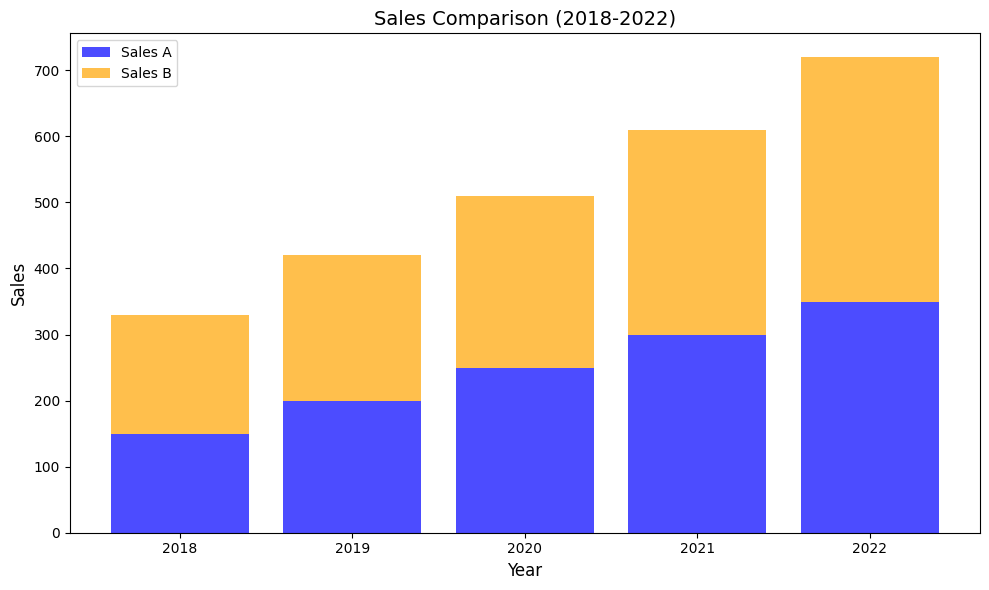

In [2]:
# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(df["Year"], df["Sales_A"], label="Sales A", alpha=0.7, color="blue")
plt.bar(df["Year"], df["Sales_B"], label="Sales B", alpha=0.7, color="orange", bottom=df["Sales_A"])
# label="Sales A"：为这个柱状图（Sales_A 数据）定义了一个标签，告诉观众这些柱子表示 "Sales A"。
# 这个必须调用，如果没有调用 plt.legend()，即使你使用了 label 参数，图例也不会显示。

# 添加标题和轴标签
plt.title("Sales Comparison (2018-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)

# 添加图例  ： 如果没有调用 plt.legend()，即使你使用了 label 参数，图例也不会显示。
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

# 两种销售数据（Sales_A 和 Sales_B）的叠加柱状图显示。
# 使用 bottom 参数实现堆叠效果。

2. 绘制折线图（年度利润趋势）

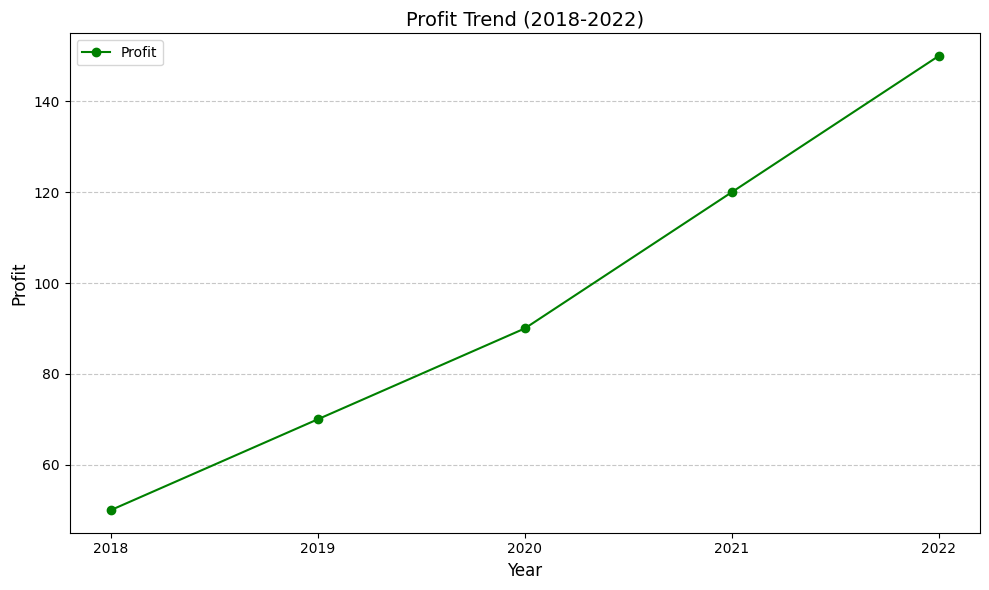

In [3]:
# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(df["Year"], df["Profit"], marker="o", color="green", label="Profit")

# 添加标题和轴标签
plt.title("Profit Trend (2018-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# 添加网格和图例
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

3. 绘制多个子图

In [ ]:
# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# 子图 1：柱状图
axes[0].bar(df["Year"], df["Sales_A"], label="Sales A", color="blue", alpha=0.7)
axes[0].bar(df["Year"], df["Sales_B"], label="Sales B", color="orange", alpha=0.7, bottom=df["Sales_A"])
axes[0].set_title("Sales Comparison")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Sales")
axes[0].legend()

# 子图 2：折线图
axes[1].plot(df["Year"], df["Profit"], marker="o", color="green", label="Profit")
axes[1].set_title("Profit Trend")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Profit")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].legend()

# 调整布局
plt.tight_layout()
plt.show()

# 左边子图是销售数据的柱状图，右边子图是利润的折线图。
# 子图布局使用 plt.tight_layout() 自动调整。

## 可视化类型：      
柱状图 (plt.bar)：适合对比数据。        
折线图 (plt.plot)：适合趋势展示。         
子图 (plt.subplots)：用于多图组合           

In [ ]:
# matplotlib 普通
# 示例数据

x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# 使用简单接口绘制图表
plt.plot(x, y, label="Example Line")
plt.title("Simple Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()

In [ ]:
# OOP （面向对象接口：fig, ax 方法）

import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4]
y1 = [10, 20, 25, 30]
y2 = [30, 25, 20, 10]

# 创建 figure 和 axes 对象
fig, ax = plt.subplots(figsize=(8, 6))

# 在 ax 对象上绘图
ax.plot(x, y1, label="Line 1", color="blue")
ax.plot(x, y2, label="Line 2", color="red")
ax.set_title("Advanced Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()

# 显示图表
plt.show()

In [ ]:
# 多子图布局

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].plot(x, y1)
axes[0, 1].plot(x, y2)
axes[1, 0].scatter(x, y1)
axes[1, 1].bar(x, y2)

ax.set_xlim(0, 5)  # 设置 X 轴范围
ax.set_ylim(0, 40)  # 设置 Y 轴范围